# Spin Wave Simulation

Instrument: ARCS
* Ei=100meV
 
Sample: an artifical sample
* lattice parameters: 2, 2.5, 3        90 90 90
* spin wave: E = 80 * | sin($\pi$h) |
* Orientation: u,v = [1 0 2] and  [1 0 0]
* psi angles: -90, 90, step 3


## Step 0. some goodies

In [26]:
%matplotlib notebook
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

In [6]:
# where am I?
import os
PWD=os.path.abspath(".")
print PWD
# It should be the directory where this jupyter notebook is

/home/lj7/dv/mcvine/training/ARCS


## Step 1. create dir structure

In [7]:
# Create a working directory for the simulation
# Change the following line to your own directory!!!
workdir = "/SNS/users/lj7/simulations/ARCS/spinwave-demo/"

In [3]:
# Prepare sample description.
# It will be used to generate files for the simulation
# and will be used in reduction and analysis

In [3]:
%%file SpinWaveDemoSample.yml
name: swdemo
chemical_formula: V8
lattice: 
 constants: 2, 2.5, 3, 90, 90, 90
 basis_vectors:
  - 2.0, 0, 0
  - 0, 2.5, 0
  - 0, 0, 3.0
excitation:
 type: spinwave
 E_Q: 80.*sqrt(1-cos(h*pi)^2)
 S_Q: 1
 Emax: 80.1
orientation:
 u: 1, 0, 2
 v: 1, 0, 0
shape: block width="5*cm" height="5*cm" thickness="2*mm"
temperature: 300*K

Overwriting SpinWaveDemoSample.yml


In [ ]:
# let mcvine workflow scaffolding helps you build the simulation directory

In [4]:
!mcvine workflow singlecrystal --outdir={workdir} --type=DGS \
    --instrument=ARCS --sample=SpinWaveDemoSample.yml

In [8]:
%cd {workdir}
!ls .

/SNS/users/lj7/simulations/ARCS/spinwave-demo
beam  README.md  sampleassembly  scattering


In [9]:
# move sample yml file here
!mv {PWD}/SpinWaveDemoSample.yml .

In [10]:
!ls .

beam  README.md  sampleassembly  scattering  SpinWaveDemoSample.yml


## Step 2. Setup beam simulation

In [7]:
# In this example we won't simulate a new beam but will reuse an existing beam
# First remove the beam dir
!rm -rf beam
# Then make a symlink
!ln -s /SNS/users/lj7/simulations/ARCS/beam/100meV beam

In [35]:
ls -l {workdir}

total 20
lrwxrwxrwx 1 lj7 users   43 Jul 28 19:09 beam -> /SNS/users/lj7/simulations/ARCS/beam/100meV/
-rw-r--r-- 1 lj7 users   73 Jul 27 13:01 README.md
drwxr-xr-x 1 lj7 users   91 Jul 28 19:09 sampleassembly/
drwxr-xr-x 1 lj7 users 4096 Jul 29 17:47 scattering/
-rw-r--r-- 1 lj7 users  326 Jul 28 19:08 SpinWaveDemoSample.yml


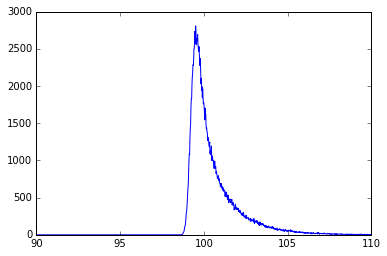

In [27]:
# check beam energy profile
import histogram.hdf as hh
ie = hh.load("beam/out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Step 3. Check and update sample assembly

In [37]:
%cd "{workdir}/sampleassembly"

/SNS/users/lj7/simulations/ARCS/spinwave-demo/sampleassembly


In [39]:
# This was generated by mcvine workflow scaffolding using
# the chemical formula in SpinWaveDemoSample.yml
# For the purpose of this tutorial, we don't need to revise it.
!cat "./swdemo.xyz"

8
2.0 0 0	0 2.5 0	0 0 3.0
V	0 0 0
V	0 0 0
V	0 0 0
V	0 0 0
V	0 0 0
V	0 0 0
V	0 0 0
V	0 0 0


In [40]:
# Also generated by mcvine workflow scaffolding.
# You can see the E(Q) and S(Q) expressions could be further simplified
!cat ./swdemo-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="16./angstrom"
	/>
    
    <!-- kernel for spin wave
      E_Q: expression for E(Q)
      S_Q: expression for E(Q)
      Emax: set this to maximum energy of the spin-wave excitation to help speed up the sim.
      orientation: flattened rotation matrix M. M dot Q_crystal = Q_instrument
     -->
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; 
             h:=0.318309886184*Qx;
             80.*sqrt(1-cos(h*pi)^2)"
	S_Q="1"
	Emax="80.1*meV"
        orientation="0.8,0.0,-0.6,0.0,1.0,0.0,0.6,0.0,0.8"
	/>
    
  </KernelContainer>
  
</homogeneous_scatterer>

In [12]:
# So we make slight revisions to scatterer.xml

In [13]:
%%file ./swdemo-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="16./angstrom"
	/>
    
    <!-- kernel for spin wave
      E_Q: expression for E(Q)
      S_Q: expression for E(Q)
      Emax: set this to maximum energy of the spin-wave excitation to help speed up the sim.
      orientation: flattened rotation matrix M. M dot Q_crystal = Q_instrument
     -->
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; 
             h:=0.318309886184*Qx;
             80.*sqrt(1-cos(h*pi)^2)"
	S_Q="1"
	Emax="80.1*meV"
        orientation="0.8,0.0,-0.6,0.0,1.0,0.0,0.6,0.0,0.8"
	/>
    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting ./swdemo-scatterer.xml


In [14]:
# confirm the changes
!cat sampleassembly.xml

<?xml version="1.0"?>

<!DOCTYPE SampleAssembly>

<SampleAssembly name="X"
   max_multiplescattering_loops_among_scatterers="1"
   max_multiplescattering_loops_interactM_path1="4"
   min_neutron_probability=".1"
 >
  
  <PowderSample name="swdemo" type="sample">
    <Shape>
      <block width="5*cm" height="5*cm" thickness="2*mm" />
    </Shape>
    <Phase type="crystal">
      <ChemicalFormula>V8</ChemicalFormula>
      <xyzfile>swdemo.xyz</xyzfile>
    </Phase>
  </PowderSample>
  
  <LocalGeometer registry-coordinate-system="InstrumentScientist">
    <Register name="swdemo" position="(0,0,0)" orientation="(0, 0, 0)"/>
  </LocalGeometer>

  <Environment temperature="300*K"/>

</SampleAssembly>


In [15]:
!ls .

sampleassembly.xml  swdemo-scatterer.xml  swdemo.xyz


## Step 4. Scattering

In [16]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/spinwave-demo/scattering


In [17]:
!ls .

scripts  template


In [ ]:
# configuration for the simulation deployment

In [18]:
%%file sim.yml

cluster:
  nodes: 10
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Writing sim.yml


In [ ]:
# run simulation for one angle to verify it is working

In [22]:
! ./scripts/sim.py --angle=31.0

ln -s ../../beam
ln -s ../../sampleassembly
SAMPLE_ANGLE=31.0 time ./scatter >log.scatter 2>&1
time ./create-nxs >log.create-nxs 2>&1
cp sim.nxs sim-31.0.nxs
mcvine instruments arcs nxs populate_metadata --type=Ei --beam_outdir=beam/out --nxs=sim-31.0.nxs


In [ ]:
# customize the simulation configuration for the full scan

In [23]:
%%file sim.yml

cluster:
  nodes: 30
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Overwriting sim.yml


In [ ]:
# a script to create a submit script submit.sh
# may need to create several scripts

In [29]:
%%file create-run.py
import numpy as np
ostream = open('run.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-run.py


In [30]:
# run the script to create submit.sh
!python ./create-run.py

In [34]:
# to check the submit script, uncomment the following line and run it
#!cat run.sh

In [32]:
# make sure run.sh is executable
!chmod +x run.sh

In [ ]:
# start simulating the scan

In [ ]:
!./run.sh >log.run

In [27]:
# Alternatively, the following will start the sim in the bg

In [ ]:
# %%script bash --bg
# ./run.sh
# this will take a while to finish.

## Step 5. Reduction

In [30]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/spinwave-demo/scattering


First we reduce event-mode nexus data for each angle using Mantid

In [38]:
# reduce tof events to E events
# this takes about 30 minutes
!mcvine workflow sxr reduce --type batch \
    --eaxis 0 90 0.5 --psi-axis -90 90.1 3. --eiguess 100 \
    --eventnxs work_%s/sim_%s.nxs --out reduced_%s.nxs\
    > log.reduce

/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [ ]:
# create configuration file for getting a slice

In [39]:
%%file slice_H00.yml
Eaxis:
 min: 0
 max: 90
 N: 181
Q_projections:
 U:
  proj: 1,0,0
  proj_name: H,0,0
  min: -5
  max: 5
  N: 251
 V:
  proj: 0,1,0
  proj_name: 0,K,0
  min: -1
  max: 1
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -1
  max: 1
  N: 1

Writing slice_H00.yml


In [31]:
!time mcvine workflow sxr slice \
    --sample {workdir}/SpinWaveDemoSample.yml \
    --psi-axis -90 90.1 3. \
    --nxs reduced_%s.nxs \
    --slice slice_H00.yml \
    --out slice_H00.nxs \
    > log.slice_H00

/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
7378.35user 674.78system 7:59.18elapsed 1680%CPU (0avgtext+0avgdata 7480728maxresident)k
0inputs+2064outputs (0major+16052657minor)pagefaults 0swaps


In [32]:
# convert slice nexus to slice histogram
!mcvine workflow sxr slice2hist slice_H00.nxs slice_H00.h5

/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.97 seconds


plot z in (0, 1e-05)


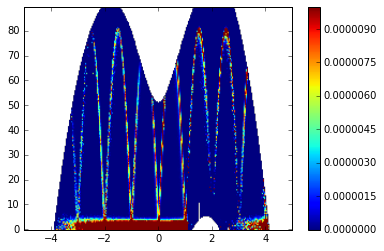

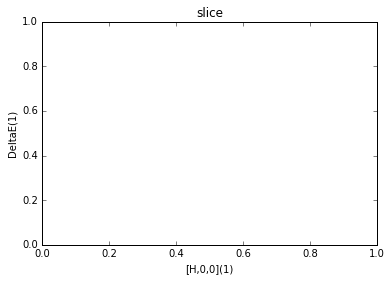

In [33]:
# plot
H.plot(hh.load("./slice_H00.h5"), min=0, max=1e-5)